# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_src, y_train_src = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train_src.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_src.shape[1::]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train_src))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

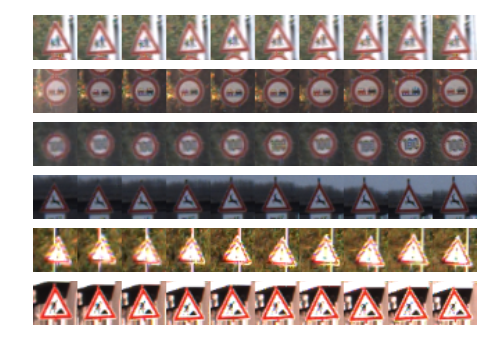

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

DRW_LIMIT_COL = 300
X_class = {}
X_class_cnt = {}
index = 0
for label in y_train_src:
    if label not in X_class:
        X_class[label] = np.array(X_train_src[index])
        X_class_cnt[label] = 0
    else: 
        if(X_class[label].shape[1] < DRW_LIMIT_COL): X_class[label] = \
            np.append(X_class[label], np.array(X_train_src[index]), axis=1) 
        #print(X_class[label].shape)
        X_class_cnt[label] += 1
    index += 1

#DRW_LIMIT_ROW = 10
DRW_ROWS = [28, 9, 7, 31, 26, 25]
index = 1
#for i in X_class:  
for i in DRW_ROWS:
    p = plt.subplot(len(DRW_ROWS),1,index)
    p.imshow(X_class[i])
    p.axis("off")
    #if index == DRW_LIMIT_ROW: break
    index += 1
plt.show()

# Visualizations will be shown in the notebook.
%matplotlib inline

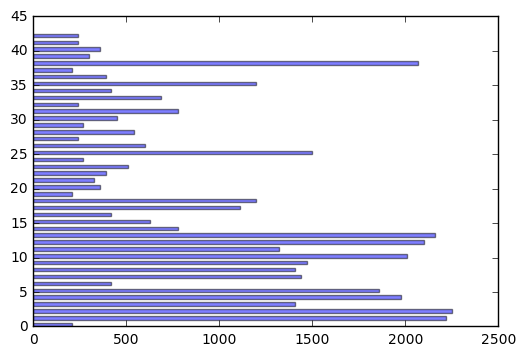

In [4]:
y_pos = []
cnt = []
for i in X_class_cnt:
    y_pos.append(i)
    cnt.append(X_class_cnt[i])
    
plt.barh(y_pos, cnt, height=0.5, alpha=0.5)
plt.show()
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# split train set to train/validation sets

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_src, y_train_src,\
                                                                test_size=0.2, random_state=0)

print("New nuumber of training examples =", len(X_train))
print("New nuumber of validation examples =", len(X_validation))
print("New number of testing examples =", len(X_test))


# normalize, firstly convert to HSV, secondly normalize to -0.5 ~ 0.5, then drop V
import matplotlib

def normalize_image(X):
    # change to float 0~1
    ret = X.astype(np.float32)/ 256
    # RGB to HSV
    #ret = matplotlib.colors.rgb_to_hsv(ret)
    # normalize to -0.5 ~ 0.5
    ret -= 0.5
    # drop H,S
    #ret = np.delete(ret, [0,1], axis=3)
    return ret

print("\nBe patient ...\n")
X_train = normalize_image(X_train) 
X_validation = normalize_image(X_validation)
X_test = normalize_image(X_test)

print("One example pixel:", X_train[50][10][10])

New nuumber of training examples = 31367
New nuumber of validation examples = 7842
New number of testing examples = 12630

Be patient ...

One example pixel: [-0.39453125 -0.41015625 -0.421875  ]


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1) Splited the data into trainning/validation sets, to avoid touching test data set which will introduce man-made choices against the generalization. 
2) Normalized RGB to -0.5 ~ 0.5, small & averaged values are easy and fast to do gradient descend.  
3) Tried to use HSV, and tried to drop 1~2 element of them, but the results were bad. I realized that both colors and grey values were useful in traffic sign classsification.
4) Didn't do angle change, since limitted bandwidth and too late of noticing all training datas had already been adjusted to straight angle. Which is why my trained model failed in classifying new images with some angle.

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
1) Splited the data into trainning/validation sets, with 8/2 ratio. Then did a normalization for all 3 data sets
2) About generating additional data, please see my comment 4) above . Should generate enough datas with angles.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# define the core network

import tensorflow as tf

def LeNet(x, input_layer, output_class):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_layer, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = tf.contrib.layers.flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, output_class), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(output_class))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits


In [8]:
# define the training operation

x = tf.placeholder(tf.float32, (None, 32, 32, X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.0002

logits = LeNet(x, X_train.shape[3], n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [9]:
# define the accuray evaluation 

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Borrowed the model of LeNet, didn't make many changes ( So I'm shamed of listing them again here). 
1) I was thinking of dropping 1~2 elements of HSV, then could use less convolutional layers, but the results turn out bad.
2) Also using sigmoid as the activation turned out to be a bad idea.

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

EPOCHS = 50
BATCH_SIZE = 256

print("Training on X_test/X_validation, be patient...\n")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(sess, X_validation, y_validation)
        print("EPOCH {} ... Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
   
    try:  # I don't understand why got name conflicted?
        saver
    except NameError:
        saver = tf.train.Saver()    
    saver.save(sess, "lenet")
    print("Model saved")

Training on X_test/X_validation, be patient...

EPOCH 1 ... Validation Accuracy = 0.274
EPOCH 2 ... Validation Accuracy = 0.460
EPOCH 3 ... Validation Accuracy = 0.576
EPOCH 4 ... Validation Accuracy = 0.655
EPOCH 5 ... Validation Accuracy = 0.727
EPOCH 6 ... Validation Accuracy = 0.753
EPOCH 7 ... Validation Accuracy = 0.804
EPOCH 8 ... Validation Accuracy = 0.834
EPOCH 9 ... Validation Accuracy = 0.863
EPOCH 10 ... Validation Accuracy = 0.866
EPOCH 11 ... Validation Accuracy = 0.883
EPOCH 12 ... Validation Accuracy = 0.886
EPOCH 13 ... Validation Accuracy = 0.896
EPOCH 14 ... Validation Accuracy = 0.904
EPOCH 15 ... Validation Accuracy = 0.906
EPOCH 16 ... Validation Accuracy = 0.912
EPOCH 17 ... Validation Accuracy = 0.924
EPOCH 18 ... Validation Accuracy = 0.924
EPOCH 19 ... Validation Accuracy = 0.934
EPOCH 20 ... Validation Accuracy = 0.939
EPOCH 21 ... Validation Accuracy = 0.935
EPOCH 22 ... Validation Accuracy = 0.942
EPOCH 23 ... Validation Accuracy = 0.944
EPOCH 24 ... Valid

In [11]:
# Evaluate on X_test now

print("Evaluate on X_test, be patient...\n")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(sess, X_test, y_test)
    print("X_test Accuracy = {:.3f}".format(test_accuracy))

Evaluate on X_test, be patient...

X_test Accuracy = 0.888


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Still borrowed from LeNet, didn't change the optimzer. Tried some approachs, but tensorflow started to crash.
1) batch size is 256, I believe SM in GPU is still far beyond its capability in memory bandwidth, shared memory capacity, and computaion capability.
2) training rate is 0.002, I didn't notice any local minimum ever happened.
3) epochs is 50, I'm glad to see that the accuray DIDN'T increase too fast.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I kept in mind some principles learned from the lecture, such as not to touch the test data set when tuning the architecture and parameters ; don't let the trainning accuray go too fast ; keep datas and weights small and averaged ;
As mentioned above, I didn't observe the trainning datas too careful. 
1) Negleted the angle problems, that's a good lesson. 
2) Also wasted many time on RGB/HSV issues, until realized both colors and grey values were important to classify traffic sign.
Also I realized a good organization of code, such as seperating pipeline preparations and actaul callings, can facilite tensorflow understanding and development speed, also avoid making kernel crashed.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

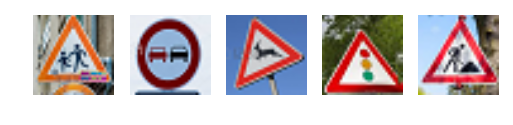

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg

new_images = ["image1.png", "image2.png", "image3.png", "image4.png", "image5.png"]
new_datas = []
index = 1
for img_name in new_images:
    img_data = mpimg.imread("new_images/" + img_name)
    # get rid of alpha
    new_datas.append(np.delete(img_data, 3, 2))
    p = plt.subplot(1, len(new_images),index)
    plt.imshow(img_data)
    p.axis("off")
    index += 1
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
1) I did some manual pre-prossing to make signs centered which should use automated code or circuits in real world .
2) The third image has some angle.

In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

label_operation = tf.argmax(logits, 1)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    label = sess.run(label_operation, feed_dict={x: new_datas})
    print("Predicated labels:", list(label))
    print("Correct labels:", [28, 9, 31, 26, 25])

Predicated labels: [28, 9, 1, 26, 25]
Correct labels: [28, 9, 31, 26, 25]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The thrid image with some angle failed in classfication. Since I negleted that all the trainning data sets have already been got straighted.

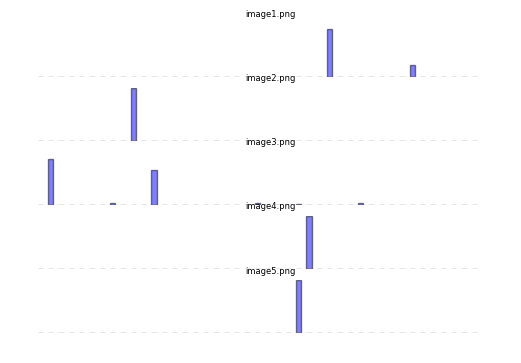

In [34]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_operation = tf.nn.softmax(logits)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    probs = sess.run(softmax_operation, feed_dict={x: new_datas})
 
index = 1
for prob in probs:    
    p = plt.subplot(len(probs), 1, index)
    p.set_title(new_images[index-1], fontsize=6)
    plt.bar(range(len(prob)), prob, width=0.5, alpha=0.5)
    p.axis("off")
    index += 1
plt.show()

# Visualizations will be shown in the notebook.
%matplotlib inline

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [36]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    probs = sess.run(tf.nn.top_k(tf.constant(probs), k=2))
    print(probs)

TopKV2(values=array([[  8.03390563e-01,   1.95362836e-01],
       [  1.00000000e+00,   1.20718742e-08],
       [  5.21109402e-01,   3.95582169e-01],
       [  9.99984026e-01,   1.13321385e-05],
       [  1.00000000e+00,   3.46120702e-11]], dtype=float32), indices=array([[28, 36],
       [ 9, 41],
       [ 1, 11],
       [26, 18],
       [25, 29]], dtype=int32))


**Answer:**
1) By observing the probabilities chart, the model is very certain about 4 correctly classified images
2) For the failed one, the correct value is NOT among top 3. As I admitted, my model has no knowledge ( trained by ) images with some angles.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.